In [2]:
import pyfair

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os

In [3]:
from pyfair.report.individual import FairReport

In [4]:
model1 = pyfair.FairModel(name="HA", n_simulations=10_000)
model1.input_data('Loss Event Frequency', low=.01, mode=.2, high=.5)
model1.input_data('Probable Loss Magnitude', low=1, mode=1_000_000, high=10_000_000)
model1.calculate_all()


fr = FairReport(model1)
fr.to_html('C:/Users/theon/Desktop/report.html')

In [182]:
'''
# Level 1



t1   = Rectangle((4800, 0), 1000, 500, color='blue')
t2   = Rectangle((6000, 0), 1000, 500, color='blue')
t3   = Rectangle((7200, 0), 1000, 500, color='blue')
t4   = Rectangle((8400, 0), 1000, 500, color='blue')

# Level 2
sr  = Rectangle((7800, 800), 1000, 500, color='blue')



# Level 3



# Level 4

'''
colors.index

Index(['Action', 'Asset Loss Factors', 'Contact', 'Control Strength',
       'External Loss Factors', 'Loss Event Frequency',
       'Organizational Loss Factors', 'Primary Loss Factors',
       'Probable Loss Magnitude', 'Risk', 'Secondary Loss Factors',
       'Threat Capability', 'Threat Event Frequency', 'Threat Loss Factors',
       'Vulnerability'],
      dtype='object')

In [157]:
statuses = model1.get_node_statuses()
colors = pd.DataFrame.from_records([statuses]).T
colors = colors.sort_index()
colors.columns = ['status']
colors['color'] = colors['status'].map({'Not Required': 'grey', 'Supplied': 'green', 'Calculated': 'blue'})

In [ ]:
['Action', 'Asset Loss Factors', 'Contact', 'Control Strength',
       'External Loss Factors', 'Loss Event Frequency',
       'Organizational Loss Factors', 'Primary Loss Factors',
       'Probable Loss Magnitude', 'Risk', 'Secondary Loss Factors',
       'Threat Capability', 'Threat Event Frequency', 'Threat Loss Factors',
       'Vulnerability'],

In [192]:
colors

,status,color
Action,Not Required,grey
Asset Loss Factors,Not Required,grey
Contact,Not Required,grey
Control Strength,Not Required,grey
External Loss Factors,Not Required,grey
Loss Event Frequency,Supplied,green
Organizational Loss Factors,Not Required,grey
Primary Loss Factors,Not Required,grey
Probable Loss Magnitude,Supplied,green
Risk,Calculated,blue


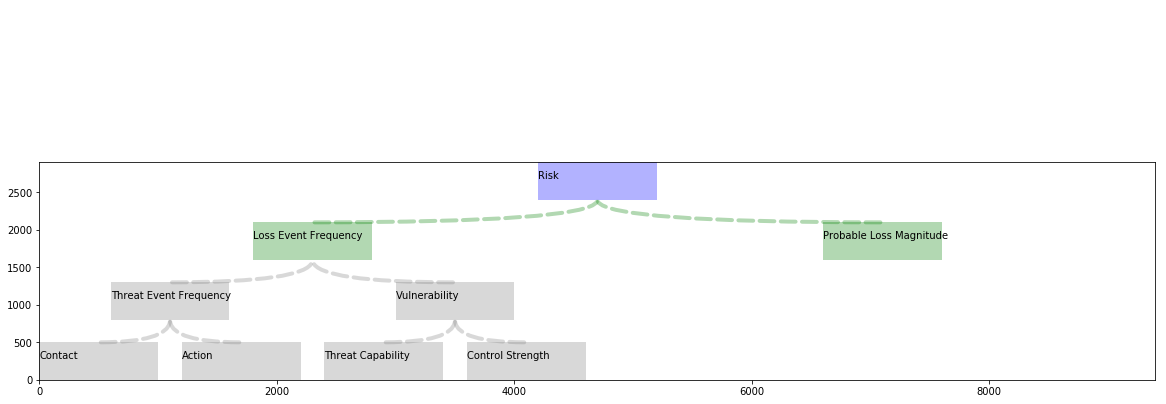

In [223]:
fig, ax = plt.subplots()
fig.set_size_inches(20,4)
ax.set_xlim(0, 9_400)
ax.set_ylim(0, 2_900)

dimensions = pd.DataFrame.from_dict({
    'Contact'                : [   0,    0,  600,  800],
    'Threat Event Frequency' : [ 600,  800, 1800, 1600],
    'Action'                 : [1200,    0,  600,  800],
    'Threat Capability'      : [2400,    0, 3000,  800],
    'Vulnerability'          : [3000,  800, 1800, 1600],
    'Control Strength'       : [3600,    0, 3000,  800],
    'Probable Loss Magnitude': [6600, 1600, 4200, 2400],
    'Loss Event Frequency'   : [1800, 1600, 4200, 2400],
    'Risk'                   : [4200, 2400, 4200, 5000],    
}, orient='index', columns=['self_x', 'self_y', 'parent_x', 'parent_y'])


combined = pd.concat([colors, dimensions], axis=1, sort=True)

patches = []
patch_colors = []

def draw_node(row, ax, patches):
    rect = Rectangle(
        (row['self_x'], row['self_y']),
        1000,
        500,
        alpha=.3,
    )
    plt.text(row['self_x'], row['self_y'] + 250, row.name, verticalalignment='bottom')
    patches.append(rect)
    patch_colors.append(row['color'])
    if (row['color'] != 'grey') or row.name != 'Risk':
        ax.annotate(
            None,
            xy=(row['parent_x'] + 500, row['parent_y']), 
            xytext=(row['self_x'] + 500, row['self_y'] + 500),     
              arrowprops=dict(
                  arrowstyle="-",
                  connectionstyle="angle3,angleA=0,angleB=-90",
                  ec=row['color'],
                  alpha=.3,
                  linestyle='--', 
                  linewidth=4),
        )

combined = combined.dropna(axis=0)
combined.apply(draw_node, axis=1, args=[ax, patches])

collection = PatchCollection(patches, facecolor=patch_colors, alpha=.3)
ax.add_collection(collection)


Text(1700, 490, '')

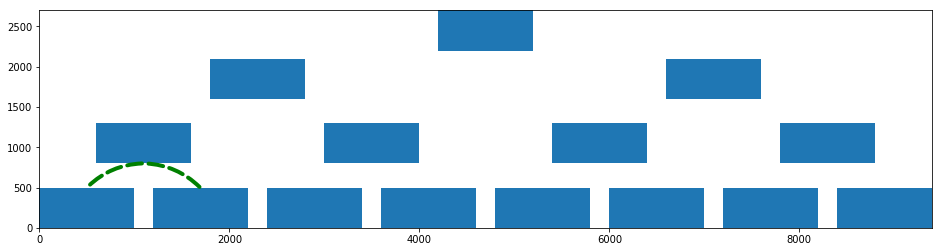

In [127]:
from matplotlib.patches import Rectangle, FancyArrowPatch
from matplotlib.collections import PatchCollection, LineCollection

fig, ax = plt.subplots()
fig.set_size_inches(16,4)
ax.set_xlim(0, 9_400)
ax.set_ylim(0, 2_700)

# Level 1
con  = Rectangle((0   , 0), 1000, 500, color='blue')
act  = Rectangle((1200, 0), 1000, 500, color='blue')
tcap = Rectangle((2400, 0), 1000, 500, color='blue')
cs   = Rectangle((3600, 0), 1000, 500, color='blue')
t1   = Rectangle((4800, 0), 1000, 500, color='blue')
t2   = Rectangle((6000, 0), 1000, 500, color='blue')
t3   = Rectangle((7200, 0), 1000, 500, color='blue')
t4   = Rectangle((8400, 0), 1000, 500, color='blue')

# Level 2
tef = Rectangle((600 , 800), 1000, 500, color='blue')
vul = Rectangle((3000, 800), 1000, 500, color='blue')
plm = Rectangle((5400, 800), 1000, 500, color='blue')
sr  = Rectangle((7800, 800), 1000, 500, color='blue')

# Level 3
lef = Rectangle((1800, 1600), 1000, 500, color='blue')
lm  = Rectangle((6600, 1600), 1000, 500, color='blue')

# Level 4
risk = Rectangle((4200, 2200), 1000, 500, color='blue')


collection_1 = PatchCollection([con, act, tcap, cs, t1, t2, t3, t4, tef, vul, plm, sr, lef, lm, risk])


ax.add_collection(collection_1)

ax.annotate(None,
                  xy=(500, 500), xycoords='data',
                  xytext=(1100, 800), textcoords='data',
                  size=20, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(1., 0.),
                                  ec="green", linestyle='--', linewidth=4),
                  )

ax.annotate(None,
                  xy=(1100, 800), xycoords='data',
                  xytext=(1700, 490), textcoords='data',
                  size=20, va="center", ha="center",
                  arrowprops=dict(arrowstyle="-",
                                  connectionstyle="arc3,rad=.2",
                                  relpos=(1., 0.),
                                  ec="green", linestyle='--', linewidth=4),
                  )

In [3]:
model1 = pyfair.FairModel(name="HA", n_simulations=10_000)
model1.input_data('Loss Event Frequency', low=.01, mode=.2, high=.5)
model1.input_data('Probable Loss Magnitude', low=1, mode=1_000_000, high=10_000_000)
model1.calculate_all()

model2 = pyfair.FairModel(name="NOT HA", n_simulations=10_000)
model2.input_data('Loss Event Frequency', low=.01, mode=.2, high=.5)
model2.input_data('Probable Loss Magnitude', low=1, mode=1_000_000, high=10_000_000)
model2.calculate_all()


meta1 = pyfair.FairMetaModel('Metamodel', [model1, model2])
out_json = pyfair.FairMetaModel('Metamodel2', [model1, meta1])

In [4]:
str(type(meta1))

"<class 'pyfair.model.meta_model.FairMetaModel'>"

In [ ]:
'''
FairModel
    Just one
FairAddititveMetaModel
    Add all the risks together and display with components
FairComparativeMetaModel
    Put risks side by side
    
Mu, Sigma for Risk

Model Params

Source
'''

In [7]:
metadata = pd.Series(
    {
        'Author': os.environ['USERNAME'],
        'Generated': str(pd.datetime.now()).partition('.')[0],
        'PyFair Version': pyfair.VERSION
    }
).to_frame()

metadata

,0
Author,theon
Generated,2019-05-13 08:25:21
PyFair Version,0.0.1


In [ ]:
#### Left third, provided data. RIght 2/3rds, tree
model2 = pyfair.read_json(results)
params = model2.export_params()
data = model2.export_results()
del params['Creation Datetime']
df = pd.DataFrame.from_dict(params)
df = df.reindex(['low', 'mode', 'high', 'p'])
df.index = df.index.str.title()
df

In [ ]:
derived = df.agg([np.mean, np.std, np.min, np.max])
derived.index = ['μ', 'σ', 'Minimum', 'Maximum']

final_data = pd.concat([derived, df], axis=0)
final_data = final_data.dropna()

# If Column as data greater than 1,
condition = final_data.max() > 1

# Get True Clumns
true_col = condition.loc[condition].index.values

#Get False COlumns
false_col = condition.loc[~condition].index.values

# If false, it's between 0 and 1. 3 decimals
final_data[false_col] = final_data[false_col]
final_data[false_col] = final_data[false_col].applymap(lambda x: '{0:.3f}'.format(x))

# If true, get the max digits and round
final_data[true_col] = final_data[true_col].astype(int)
final_data[true_col] = final_data[true_col].applymap(lambda x: '{0:,}'.format(x))

for column in ['Probable Loss Magnitude', 'Risk']:
    if column in final_data.columns:
        final_data[column] = '$' + final_data[column]

final_data.T

In [ ]:
model3 = pyfair.read_json(results)
df3 = model3.export_results()
risk = df3['Risk']
risk_d = risk.agg([np.mean, np.std, np.min, np.max]).astype(int)
risk_d.index = ['μ', 'σ', 'Minimum', 'Maximum']

pd.DataFrame(risk_d).T.applymap(lambda x: '${0:,}'.format(x))

In [ ]:
# Draw curves?
model3.__class__

In [ ]:
dollar_format_string     = '${0:,}'
integer_format_string    = '{0:,}'
percentage_format_string = '{0:.3f}'
format_strings = {
    'Risk'                        : dollar_format_string,
    'Loss Event Frequency'        : integer_format_string,
    'Threat Event Frequency'      : integer_format_string,
    'Vulnerability'               : integer_format_string,         
    'Contact'                     : percentage_format_string,
    'Action'                      : percentage_format_string,
    'Threat Capability'           : percentage_format_string,
    'Control Strength'            : percentage_format_string,
    'Probable Loss Magnitude'     : dollar_format_string,
    'Primary Loss Factors'        : dollar_format_string,
    'Asset Loss Factors'          : dollar_format_string,
    'Threat Loss Factors'         : dollar_format_string,
    'Secondary Loss Factors'      : dollar_format_string,
    'Organizational Loss Factors' : dollar_format_string,
    'External Loss Factors'       : dollar_format_string,
}

SINGLE
    header
    meta
    left third, risk top then params. right 2/3, tree diagram
    left have loss excedence, right half exceedence probability
    code
    
COMPARISON
    header
    meta
    left third, risk top then params for each. right 2/3, tree diagram
    left have loss excedence, right half exceedence probability
    code

ADDITIVE
    header
    meta
    for each:
        left third, risk top then params. right 2/3, tree diagram
        left have loss excedence, right half exceedence probability
    for all:
        loss exceedence and exceedence probability and 
        risk
    code

In [ ]:
class FairBasic()

In [ ]:
uuid.uuid1()

In [ ]:
import os
import subprocess
import tempfile

td = tempfile.mkdtemp()
tf = tempfile.NamedTemporaryFile(dir=td, mode='w+')
os.chdir(td)

tf.write('LATEX!')

os.listdir(td)

p = subprocess.run(['dir', str(td)])

In [ ]:
model

In [ ]:
td